# Exploratory Notebook

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sqlite3
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading Data

bom_movie_gross

In [2]:
bom_movie_gross=pd.read_csv('../Data/bom.movie_gross.csv.gz' , compression='gzip')

In [3]:
#pd.options.display.max_columns=100

The data base


In [4]:
conn1=sqlite3.connect('../Data/im.db/im.db')

In [5]:
query=("""
SELECT *
FROM movie_basics

""")
movie_basics=pd.read_sql(query,conn1)

movie_info

In [6]:
movie_info=pd.read_csv('../Data/rt.movie_info.tsv.gz' , delimiter='\t' ,compression='gzip')

reviews

In [7]:
reviews=pd.read_csv('../Data/rt.reviews.tsv.gz' , delimiter='\t' ,compression='gzip' , encoding='windows-1252')

The movie data base

In [8]:
tmdb_df=pd.read_csv('../Data/tmdb.movies.csv.gz',compression='gzip' , index_col=0)

movie_budget

In [9]:
movie_budget=pd.read_csv('../Data/tn.movie_budgets.csv.gz' , compression='gzip')

## Exploring and Cleaning of Data

###### bom_movie_gross cleaning and checking data

In [10]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [11]:
bom_movie_gross.sort_values('domestic_gross' , ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


In [12]:
#bom_movie_gross.loc[bom_movie_gross['foreign_gross'].str.contains('\d' , regex=True , na=False)]
for index , val in bom_movie_gross.foreign_gross.items():
    #if isinstance(val, str) and re.search((r'\d*\.\d+') , str(val)):
    if re.search((r'\d*\.\d+') , str(val)):
        spl_val=val.split('.')
        val=spl_val[0]+('0'*int(spl_val[1]))
        bom_movie_gross.at[index,'foreign_gross']=str(val)

In [13]:
#changing foreign gross column in to float data type
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].str.replace(',' , '')

In [14]:
#filled null values with zero instead of droping , because we can have it from other data
bom_movie_gross=bom_movie_gross.fillna(0)

In [15]:
cols=['domestic_gross','foreign_gross']
bom_movie_gross[cols]=bom_movie_gross[cols].astype(int)

In [16]:
# created new column world wide profit
bom_movie_gross['world_wide_profit']=bom_movie_gross.foreign_gross+bom_movie_gross.domestic_gross

In [17]:
bom_movie_gross.sort_values('domestic_gross' , ascending=False)

,title,studio,domestic_gross,foreign_gross,year,world_wide_profit
1872,Star Wars: The Force Awakens,BV,936700000,1131000000,2015,2067700000
3080,Black Panther,BV,700100000,646900000,2018,1347000000
3079,Avengers: Infinity War,BV,678800000,136900000,2018,815700000
1873,Jurassic World,Uni.,652300000,10190000,2015,662490000
727,Marvel's The Avengers,BV,623400000,895500000,2012,1518900000
...,...,...,...,...,...,...
936,"Lula, Son of Brazil",NYer,0,3800000,2012,3800000
1079,The Green Wave,RF,0,70100,2012,70100
1975,Surprise - Journey To The West,AR,0,49600000,2015,49600000
966,The Cup (2012),Myr.,0,1800000,2012,1800000


In [18]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,world_wide_profit
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000


In [19]:
bom_movie_gross.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
world_wide_profit    0
dtype: int64

###### Movie_info data cleaning

In [20]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [21]:
#droped currency and box_office columns from movie_info because they have a lot of null values
movie_info.drop(["currency" , 'box_office'], axis='columns' , inplace=True)

In [22]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
runtime           30
studio          1066
dtype: int64

In [23]:
movie_info.sample(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,studio
162,213,After a married songwriter is rescued by an It...,NR,Classics|Drama|Musical and Performing Arts,Edoardo Anton|Henry Cass,NaN,"Dec 31, 1950","Feb 15, 2005",98 minutes,NaN
1349,1743,This animated feature chronicles the trials an...,G,Animation|Kids and Family|Science Fiction and ...,Art Vitello,NaN,NaN,NaN,100 minutes,NaN
459,602,"In flashback, we learn how nerdish computer wh...",R,Drama,Richard Loncraine,Desmond Lowden|Richard Loncraine|Michael Wearing,NaN,NaN,112 minutes,NaN
674,862,A man is being driven crazy by his shiftless b...,PG-13,Comedy,Anthony Russo|Joe Russo,NaN,"Jul 13, 2006","Nov 21, 2006",109 minutes,Universal Pictures
442,581,David Wagner is a Nineties kid with a Fifties ...,PG-13,Comedy|Drama|Science Fiction and Fantasy,Gary Ross,Gary Ross,"Oct 23, 1998","Mar 23, 1999",125 minutes,New Line Cinema


In [24]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
runtime           30
studio          1066
dtype: int64

##### Reviews data cleaning

In [25]:
reviews.id.unique()

array([   3,    5,    6, ..., 1998, 1999, 2000], dtype=int64)

In [26]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [27]:
#created a new column to have numeric values of fresh column -- fresh=1 and rotten=0
reviews['num_fresh']=""
for index, value in reviews.fresh.items():
    if value=='fresh':
        reviews.at[index , 'num_fresh']=1
    else: reviews.at[index , 'num_fresh']=0

In [28]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,num_fresh
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",1
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",0
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",1
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",1
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",1


In [29]:
reviews.rating.unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

### --->>reviews rating column has mixed input witch we should clean and normalize it

In [30]:
#pd.set_option('display.max_rows',None)
#reviews.rating.unique()


In [31]:
#letter_grades={'A': 10 , 'B+': 8.5,'B': 8,'B-': 7.5,'C+': 7,
               #'C': 6, 'C-': 5.5,'D+': 5,'D': 4,'D-': 3.5,
               #'F': 0}
#reviews['new_rating']=""
#for index , value in reviews.rating.items():
    #if re.search((r'*/5') , value):
        #reviews.at[index,'new_rating']=int(value.strip('/5')*2
                                           
    #elif re.search((r'*/10') , value):
        #reviews.at[index,'new_rating']=int(value.strip('/10')
                                           
    #elif value in letter_grades:
        #reviews.at[index,'new_rating']=letter_grades['value']
                                                                   
    #else: reviews.at[index,'new_rating']=None 

In [32]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
 8   num_fresh   54432 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.7+ MB


In [33]:
reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
num_fresh         0
dtype: int64

remove this raw with wrong value

In [34]:
#reviews.loc[reviews['rating']=='T']

###### tmdb_df cleaning

In [35]:
#dropped duplicated rows
tmdb_df=tmdb_df.drop_duplicates()

In [36]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [37]:
genre_map = {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy',
             80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 
             14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 
             9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 
             10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}
#tmdb['genres'] = tmdb['genre_ids'].apply(lambda x: [genre_map[int(genre_id)] for genre_id in eval(x)])
tmdb_df['genres_labels'] = tmdb_df['genre_ids'].apply(lambda x: ', '.join([genre_map[int(genre_id)] for genre_id in eval(x)]))


In [38]:
tmdb_df.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres_labels
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"Adventure, Fantasy, Family"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"Fantasy, Adventure, Animation, Family"


In [39]:
tmdb_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
genres_labels        0
dtype: int64

###### movie_budget cleaning

In [40]:
#casting release date type in to datetime type
movie_budget.release_date=pd.to_datetime(movie_budget.release_date)

In [41]:
# function which helps us to omit $ and , from any column and cast it in to float type
# used dtype=np,int64 to support long integers
def change(data):
    data = data.str.replace('[$,]', '', regex=True)
    return data.astype(dtype=np.int64)


In [42]:
#applied change function to three columns :domestic_gross,worldwide_gross, production_budget using apply method
movie_budget[['domestic_gross', 'worldwide_gross', 'production_budget']] = movie_budget[['domestic_gross', 'worldwide_gross', 'production_budget']].apply(change)

In [43]:
#created net profit by subructing budget from gross
movie_budget['net_profit']= movie_budget['worldwide_gross'] - movie_budget['production_budget'] 

#### Merged bom_movie_gross and movie_budget by title and movie columns respectiviely (inner)

In [44]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,world_wide_profit
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000


In [45]:
movie_budget.shape

(5782, 7)

In [46]:
#merged bom_movie_gross and movie_budget by title and movie columns respectiviely (inner)
gross_budget = pd.merge(bom_movie_gross, movie_budget, how='outer', left_on='title', right_on='movie')

In [47]:
#function for creating a new column which has the values from both tables
def combine_titles(data , col1,col2):
    if pd.notna(data[col1]) and pd.notna(data[col2]):
        return data[col1]
    elif pd.notna(data[col1]):
        return data[col1]
    elif pd.notna(data[col2]):
        return data[col2]
    else:return None

Calling the function

In [48]:
gross_budget['movie_title']=gross_budget.apply(combine_titles ,args=('movie','title'), axis=1)

In [49]:
gross_budget['domestic_gross']=gross_budget.apply(combine_titles ,args=('domestic_gross_y','domestic_gross_x'), axis=1)

In [50]:
gross_budget['world_wide_gross_Profit']=gross_budget.apply(combine_titles ,args=('worldwide_gross','world_wide_profit'), axis=1)

In [51]:
#dropped columns which wont help us for analysis and also duplicates
drop_cols=['title','studio','domestic_gross_x' ,'year','release_date','movie','domestic_gross_y','world_wide_profit','id'
           ,'worldwide_gross']
gross_budget.drop(drop_cols , axis=1 , inplace=True)
#gross_budget.set_index('id',inplace=True)

In [52]:
# filling foreign gross null values from domestic gross y - worldwide_gross
for index,value in enumerate(gross_budget.foreign_gross):
    if (pd.isna(value) or value==0.0):
        gross_budget.at[index,'foreign_gross']=gross_budget.world_wide_gross_Profit[index]- gross_budget.domestic_gross[index]

In [53]:
#remove rows with zero values in world_wide_gross
gross_budget=gross_budget.loc[gross_budget.world_wide_gross_Profit!=0]
gross_budget=gross_budget.loc[gross_budget.domestic_gross!=0]

In [54]:
gross_budget.dropna(subset=['net_profit', 'production_budget'], inplace=True)

In [55]:
gross_budget.shape

(5234, 6)

In [56]:
gross_budget.isna().sum()

foreign_gross              0
production_budget          0
net_profit                 0
movie_title                0
domestic_gross             0
world_wide_gross_Profit    0
dtype: int64

In [57]:
#created new column ROI(Return on investment)
gross_budget['ROI']=(gross_budget.net_profit/gross_budget.production_budget)*100

In [58]:
gross_budget.head()

,foreign_gross,production_budget,net_profit,movie_title,domestic_gross,world_wide_gross_Profit,ROI
0,652000000.0,200000000.0,868879522.0,Toy Story 3,415004880.0,1.068880e+09,434.439761
3,535700000.0,160000000.0,675524642.0,Inception,292576195.0,8.355246e+08,422.202901
4,513900000.0,165000000.0,591244673.0,Shrek Forever After,238736787.0,7.562447e+08,358.330105
5,398000000.0,68000000.0,638102828.0,The Twilight Saga: Eclipse,300531751.0,7.061028e+08,938.386512
6,311500000.0,170000000.0,451156389.0,Iron Man 2,312433331.0,6.211564e+08,265.386111


In [59]:
tmdb_df.head(1)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres_labels
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"Adventure, Fantasy, Family"


#### merged gross_budget and tmdb to have the genra

In [60]:
#merging gross_budget & tmdb on left
gross_budget_tmd = pd.merge(gross_budget,
                       tmdb_df,
                       left_on='movie_title',
                       right_on='title',
                       how='left')

In [61]:
#dropped all null values
gross_budget_tmd = gross_budget_tmd.dropna()

In [62]:
#dropped unwanted cols
drop_col2=['original_language','original_title','title']
gross_budget_tmd.drop(drop_col2 , axis=1 , inplace=True)

In [63]:
gross_budget_tmd.head(3)

,foreign_gross,production_budget,net_profit,movie_title,domestic_gross,world_wide_gross_Profit,ROI,genre_ids,id,popularity,release_date,vote_average,vote_count,genres_labels
0,652000000.0,200000000.0,868879522.0,Toy Story 3,415004880.0,1.068880e+09,434.439761,"[16, 10751, 35]",10193.0,24.445,2010-06-17,7.7,8340.0,"Animation, Family, Comedy"
1,535700000.0,160000000.0,675524642.0,Inception,292576195.0,8.355246e+08,422.202901,"[28, 878, 12]",27205.0,27.920,2010-07-16,8.3,22186.0,"Action, Science Fiction, Adventure"
2,513900000.0,165000000.0,591244673.0,Shrek Forever After,238736787.0,7.562447e+08,358.330105,"[35, 12, 14, 16, 10751]",10192.0,15.041,2010-05-16,6.1,3843.0,"Comedy, Adventure, Fantasy, Animation, Family"


Exploratory Visualization

In [64]:
top_net_profit=gross_budget.sort_values('net_profit',ascending=False).head(20)

C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


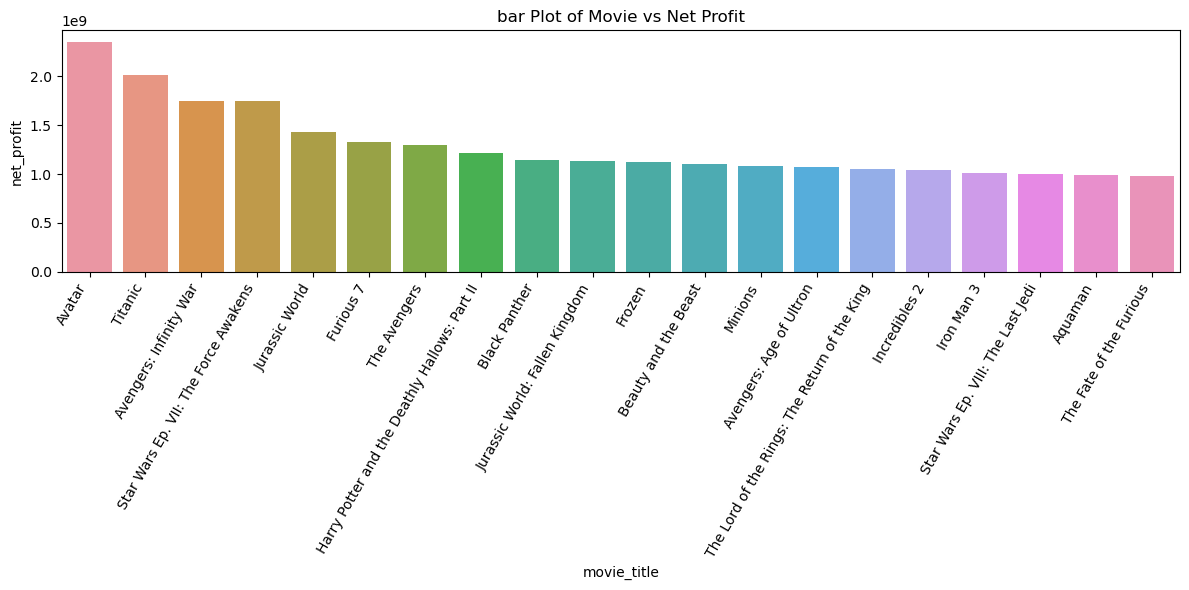

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x='movie_title', y='net_profit', data=top_net_profit)
plt.title('bar Plot of Movie vs Net Profit')
plt.xticks(rotation=60, ha='right')  # Rotate x-axis labels to 60 degrees and align to the right
plt.tight_layout()
plt.show()

#### Merging gross_budget and movie basic rating

In [66]:
#gross_budget_genres = pd.merge(gross_budget, movie_basics_rating, how='inner', left_on='movie_title', right_on='title')

In [67]:
#gross_budget_genres.sort_values('world_wide_gross_Profit',ascending=False)

###### Movie_basics cleaning

In [68]:
query=("""
SELECT *
FROM movie_akas
WHERE region=='US'

""")
movie_basics=pd.read_sql(query,conn1)
movie_basics.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
1,tt0369610,29,Jurassic World,US,None,None,None,0.0
2,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
3,tt0369610,36,Jurassic Park IV,US,None,working,None,0.0
4,tt0369610,44,Jurassic Park 4,US,None,None,informal alternative title,0.0


In [69]:
#join movie_basic and movie_rating
query=("""
SELECT *
FROM movie_basics AS mb
     JOIN movie_ratings AS mr 
     USING(movie_id)
""")
movie_basics_rating=pd.read_sql(query,conn1)
movie_basics_rating.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [177]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25497 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
 9   genres_labels      25497 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 2.1+ MB


Clean data to CSV

In [70]:
gross_budget.to_csv('../Data/clean_data/gross_budget.csv')

In [71]:
gross_budget_tmd.to_csv('../Data/clean_data/gross_budget_tmd.csv')